<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-Import" data-toc-modified-id="Library-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library Import</a></span></li><li><span><a href="#Hands-On-with-Python:-Exercise-1" data-toc-modified-id="Hands-On-with-Python:-Exercise-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hands-On with Python: Exercise 1</a></span></li></ul></div>

## Library Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Hands-On with Python: Exercise 1
1. Generate 200 data points between 0 and 30 from unifrom distribution
2. Set intercept and slope to values of your choice
3. y_true = intercept + slope x
4. y_obs = y_true + ϵ ~N(0, 0.5)
5. Create a design Matrix
6. learn parameters the parameters of your model using MLE θ

In [2]:
# Generate 200 data points between 0 and 30 from unifrom distribution 
sample_n = 200
x = np.random.uniform(30 ,0 ,sample_n)

In [3]:
# Set intercept and slope to values of your choice 
β_0 = 5.67 
β_1 = 2.18

In [4]:
# y_true = intercept + slope x
y_tru = β_0 + β_1 * x

In [5]:
# y_obs = y_true + ϵ ~N(0, 0.5)
mu = 0
sigma = 0.5
ϵ = np.random.normal(mu ,sigma ,sample_n)
y_obs = y_tru + ϵ

In [6]:
# Create a design Matrix
mat_len = len(x)
X = np.matrix([np.ones(mat_len), x]).T #design Matrix
Y = np.matrix(y_obs).T

In [7]:
# learn parameters the parameters of your model using MLE θ
l_par = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

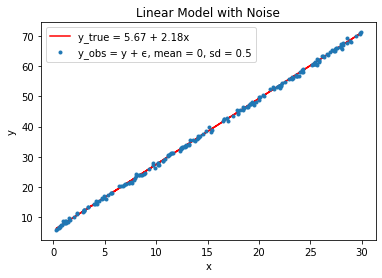

In [8]:
# Plot linear model with Noise 
plt.plot(x,y_tru,'r-',label='y_true = {} + {}x'.format(β_0,β_1));
plt.plot(x,y_obs,'.',label='y_obs = y + ϵ, mean = {}, sd = {}'.format(mu, sigma));
plt.xlabel('x');
plt.ylabel('y');
plt.title('Linear Model with Noise')
plt.legend();

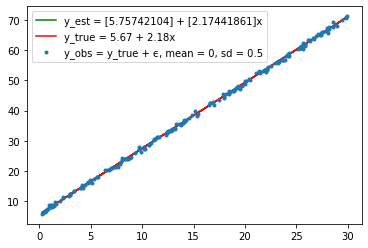

In [9]:
# Model fit plot OLS 
y_est = l_par[0] + l_par[1] * x
plt.plot(np.array(x), np.array(y_est).flatten(), color='g', 
         label = 'y_est = {} + {}x'.format(np.array(l_par[0]).flatten(), np.array(l_par[1]).flatten()));
plt.plot(x,y_tru,'r-',label='y_true = {} + {}x'.format(β_0,β_1));
plt.plot(x, y_obs,'.',label='y_obs = y_true + ϵ, mean = {}, sd = {}'.format(mu, sigma));
plt.legend();

In [10]:
σ_square = np.array((1/mat_len)*((Y - X.dot(l_par)).T.dot(Y - X.dot(l_par)))).flatten()

In [11]:
σ_square 

array([0.21595841])

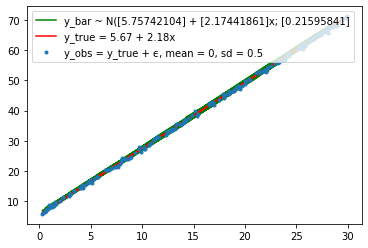

In [12]:
# Model fit plot MLS 
y_est = np.random.normal(l_par[0] + l_par[1] *x,σ_square**(1/2))
plt.plot(np.array(x), np.array(y_est).flatten(), color='g', 
         label='y_bar ~ N({} + {}x; {}'.format(np.array(l_par[0]).flatten(),np.array(l_par[1]).flatten(), σ_square));
plt.plot(x,y_tru,'r-',label='y_true = {} + {}x'.format(β_0,β_1));
plt.plot(x, y_obs,'.',label='y_obs = y_true + ϵ, mean = {}, sd = {}'.format(mu, sigma));
plt.legend(loc = "upper left");

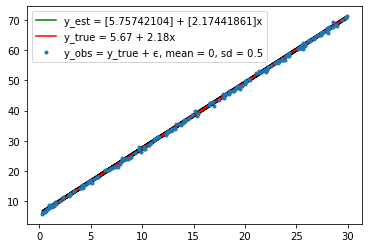

In [13]:
y_est = l_par[0] + l_par[1] * x
y_est2 = (l_par[0] + l_par[1] * x) + σ_square**(1/2) # Certainty region 
y_est3 = (l_par[0] + l_par[1] * x) - σ_square**(1/2) # Certainty region 
plt.plot(np.array(x), np.array(y_est).flatten(), color='g', 
         label = 'y_est = {} + {}x'.format(np.array(l_par[0]).flatten(), np.array(l_par[1]).flatten()));
plt.plot(np.array(x), np.array(y_est2).flatten(), color='k');
plt.plot(np.array(x), np.array(y_est3).flatten(), color='k');
plt.plot(x,y_tru,'r-',label='y_true = {} + {}x'.format(β_0,β_1));
plt.plot(x, y_obs,'.',label='y_obs = y_true + ϵ, mean = {}, sd = {}'.format(mu, sigma));
plt.legend(loc = "upper left");

In [14]:
# Prediction Values 
val = [1,2,3,4]

In [15]:
# MLE Prediction equation
y_mle_pred = np.array(np.random.normal(l_par[0] + l_par[1] * [val],σ_square**(1/2))).flatten()

In [16]:
y_mle_pred

array([ 8.13437584, 10.81342982, 12.55318206, 15.10190606])